# Librerías

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error
from tensorflow.keras import backend,layers,optimizers,Sequential

# Preprocesamiento de datos

In [224]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [225]:
df['Performance Index'] = df['Performance Index'].astype('int64')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [227]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [228]:
y = df['Performance Index']
X = df.drop(columns='Performance Index')

In [229]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=321)
print('Dimensiones X_train', X_train.shape)
print('Dimensiones y_train', y_train.shape)
print('Dimensiones X_val', X_val.shape)
print('Dimensiones y_val', y_val.shape)
print('Dimensiones X_test', X_test.shape)
print('Dimensiones y_test', y_test.shape)

Dimensiones X_train (6000, 5)
Dimensiones y_train (6000,)
Dimensiones X_val (2000, 5)
Dimensiones y_val (2000,)
Dimensiones X_test (2000, 5)
Dimensiones y_test (2000,)


In [230]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [231]:
df_train = pd.concat(objs=[X_train,y_train],axis=1)
df_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,2,81,No,7,2,59
1,6,42,No,8,1,30
2,2,68,Yes,5,3,44
3,7,84,Yes,4,7,74
4,4,42,Yes,7,2,24
...,...,...,...,...,...,...
5995,1,68,No,7,8,46
5996,4,42,No,5,4,22
5997,6,56,No,4,9,46
5998,1,41,Yes,5,5,14


In [232]:
df_val = pd.concat(objs=[X_val,y_val],axis=1)
df_val

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,3,92,No,8,2,73
1,1,95,Yes,8,1,67
2,7,94,No,4,0,83
3,8,51,Yes,8,2,43
4,7,54,No,5,6,45
...,...,...,...,...,...,...
1995,4,84,No,6,2,68
1996,5,75,No,8,5,61
1997,7,62,No,7,2,52
1998,8,86,No,9,2,82


In [233]:
df_test = pd.concat(objs=[X_test,y_test],axis=1)
df_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,8,86,Yes,7,3,82
1,3,56,No,7,6,36
2,2,46,Yes,7,9,23
3,1,40,No,5,9,10
4,5,65,No,9,0,54
...,...,...,...,...,...,...
1995,2,88,Yes,6,6,65
1996,2,63,No,8,9,39
1997,3,62,No,8,1,41
1998,9,41,No,9,8,39


In [234]:
df_train.describe().round()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,6000.0,6000.0,6000.0,6000.0,6000.0
mean,5.0,69.0,7.0,5.0,55.0
std,3.0,17.0,2.0,3.0,19.0
min,1.0,40.0,4.0,0.0,11.0
25%,3.0,54.0,5.0,2.0,40.0
50%,5.0,69.0,7.0,5.0,55.0
75%,7.0,85.0,8.0,7.0,71.0
max,9.0,99.0,9.0,9.0,100.0


In [235]:
col_numericas = df_train.describe().columns
col_numericas_X = list(col_numericas)
col_numericas_X.remove('Performance Index')

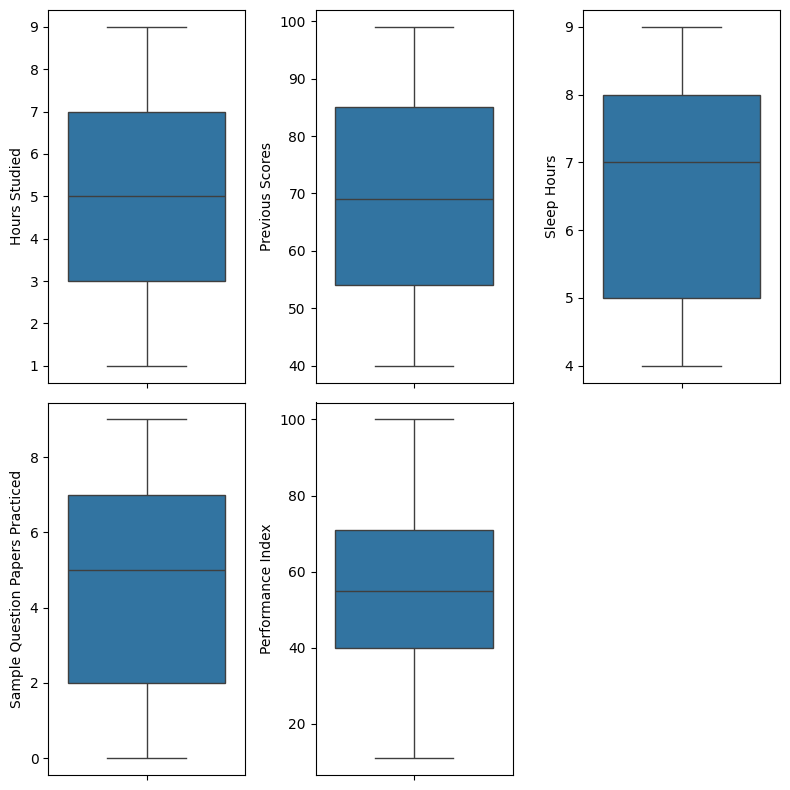

In [236]:
plt.figure(figsize=(8,8))
for i,variable in enumerate(col_numericas,1):
    plt.subplot(2, 3, i)  
    sns.boxplot(data=df_train,y=variable)
plt.tight_layout()
plt.show()

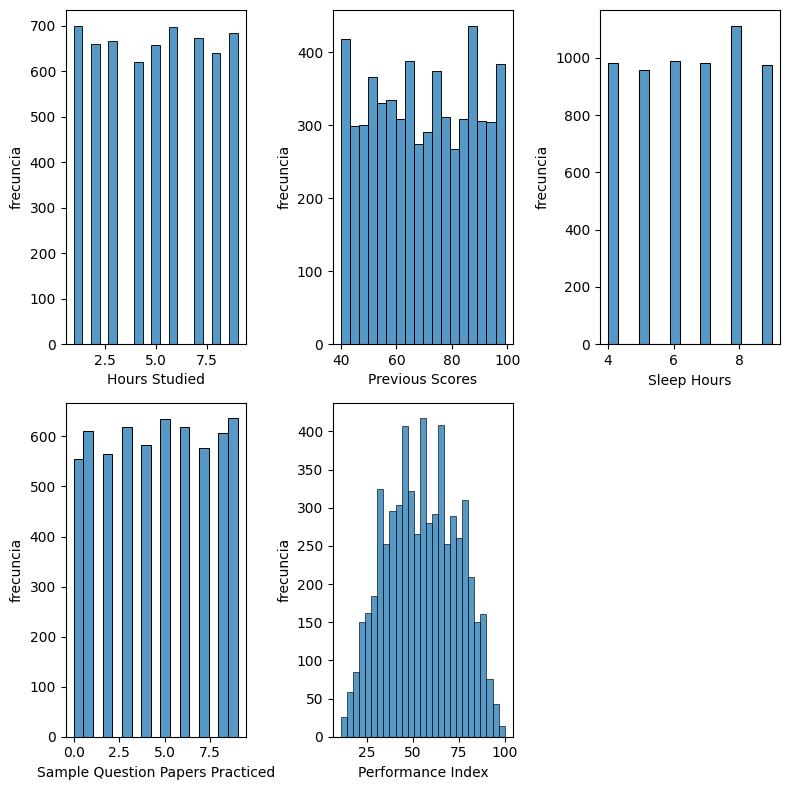

In [237]:
plt.figure(figsize=(8,8))
for i,variable in enumerate(col_numericas,1):
    plt.subplot(2, 3, i)  
    sns.histplot(data=df_train,x=variable)
    plt.ylabel('frecuncia')
plt.tight_layout()
plt.show()

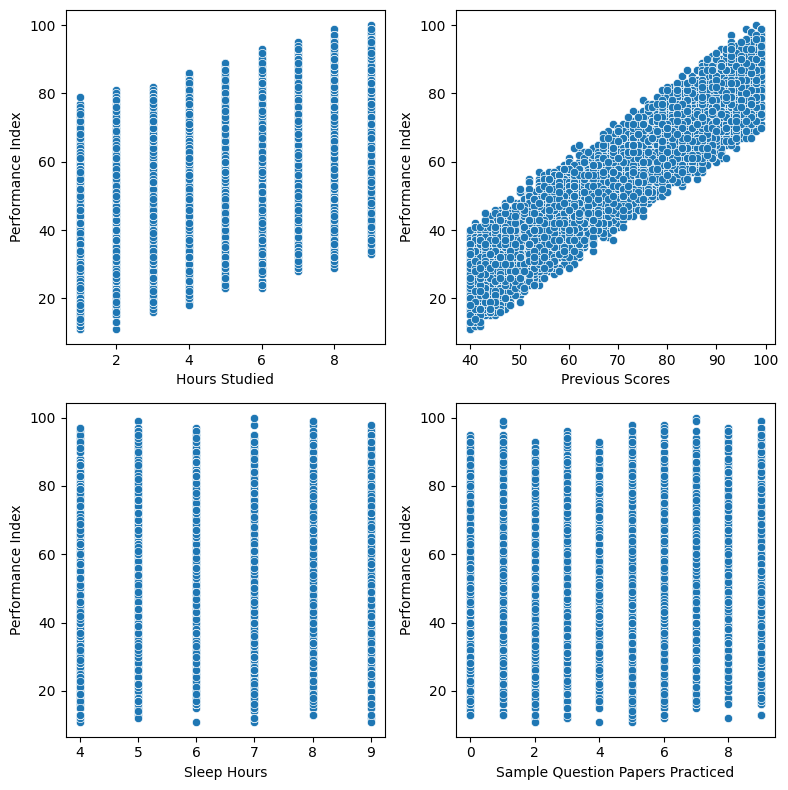

In [238]:
plt.figure(figsize=(8,8))
for i,variable in enumerate(col_numericas,1):
    if variable == 'Performance Index':continue
    plt.subplot(2, 2, i)  
    sns.scatterplot(data=df_train,x=variable,y='Performance Index')
plt.tight_layout()
plt.show()

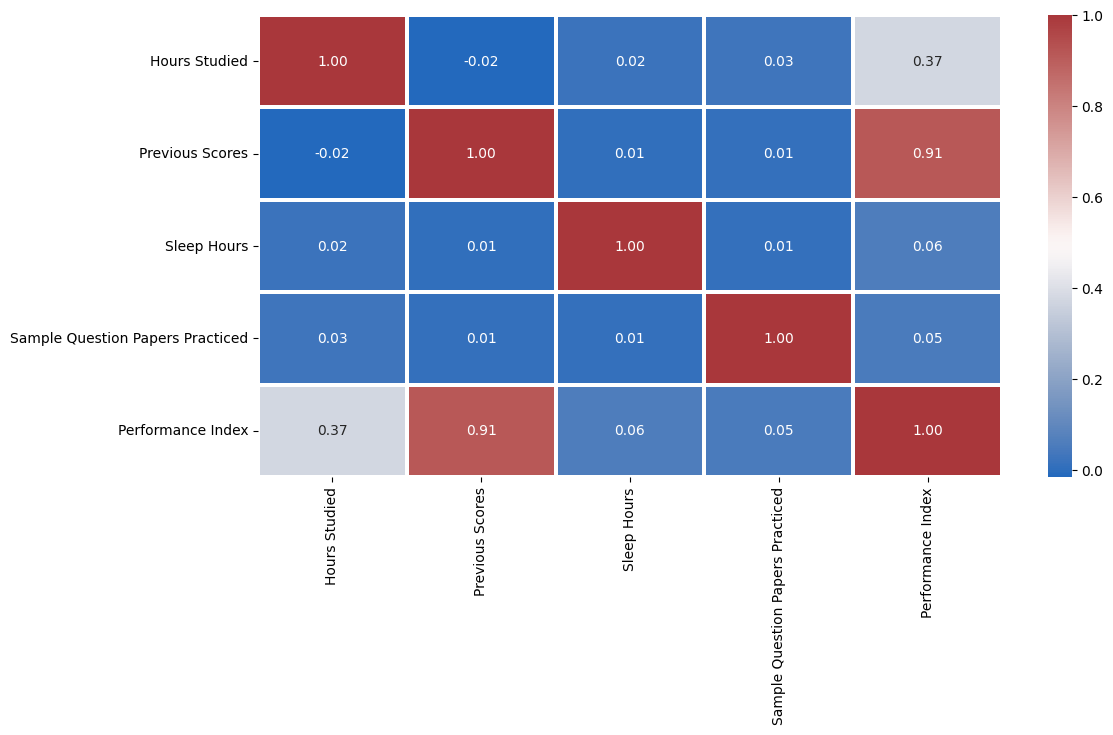

In [239]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=df_train[col_numericas].corr(),annot=True,fmt=".2f",linewidths=1.5,cmap='vlag')
plt.show()

In [240]:
features = X_train.columns
n_features = len(features)
n_col = n_features//2 if n_features%2 == 0 else n_features//2+1
print(n_features,n_col)

5 3


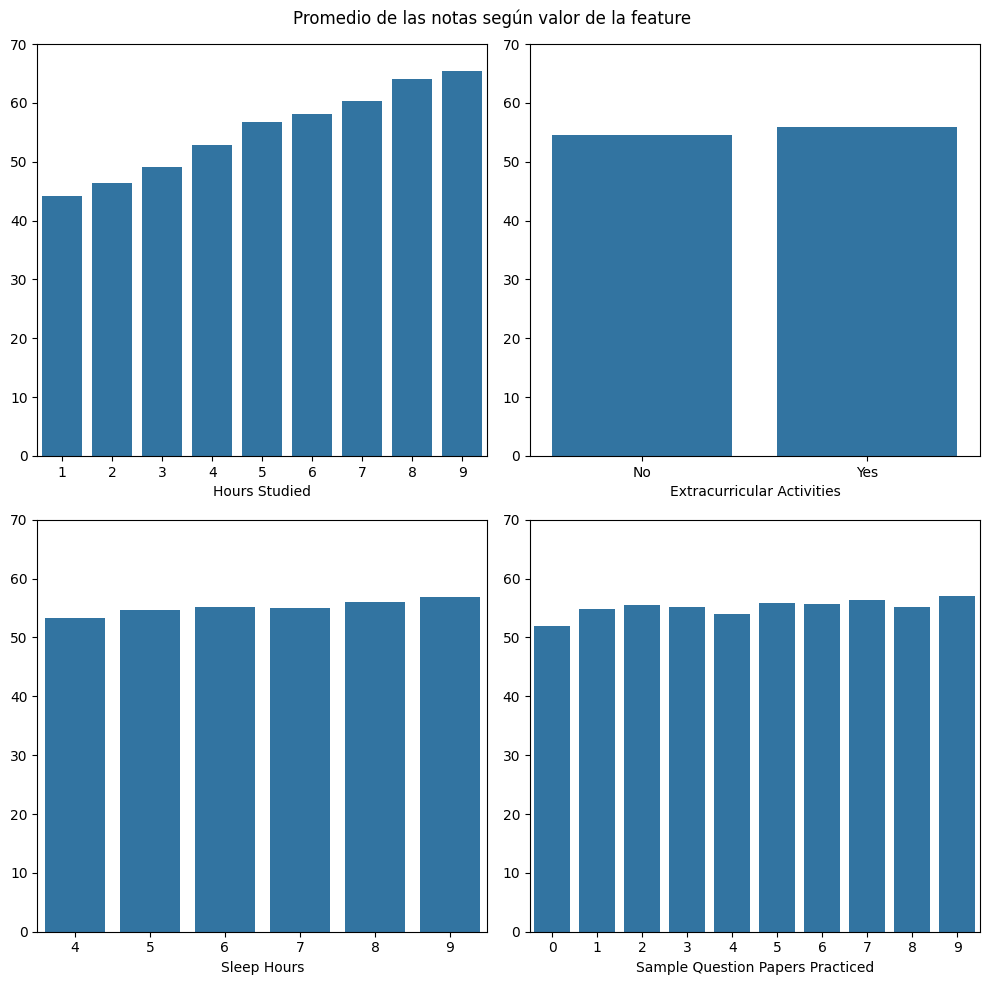

In [241]:
features = list(X_train.columns)
features.remove('Previous Scores')
n_features = len(features)
n_row = n_features//2 if n_features%2 == 0 else n_features//2+1
plt.figure(figsize=(10,10))
for n_subplot,feature in enumerate(features,1):
    plt.subplot(n_row,2,n_subplot)
    sns.barplot(data=df_train,x=feature,y='Performance Index',errorbar=None)
    plt.ylabel(None)
    plt.yticks(range(0,80,10))
plt.suptitle('Promedio de las notas según valor de la feature ')
plt.tight_layout()
plt.show()

In [242]:
enc = OneHotEncoder(sparse_output=False)

train_feature_enc = enc.fit_transform(pd.DataFrame(X_train['Extracurricular Activities']))
train_feature_enc_df = pd.DataFrame(data=train_feature_enc,columns=enc.get_feature_names_out())
X_train_enc = pd.concat(objs=[X_train,train_feature_enc_df],axis=1).drop(columns='Extracurricular Activities')

val_feature_enc = enc.transform(pd.DataFrame(X_val['Extracurricular Activities']))
val_feature_enc_df = pd.DataFrame(data=val_feature_enc,columns=enc.get_feature_names_out())
X_val_enc = pd.concat(objs=[X_val,val_feature_enc_df],axis=1).drop(columns='Extracurricular Activities')

test_feature_enc = enc.transform(pd.DataFrame(X_test['Extracurricular Activities']))
test_feature_enc_df = pd.DataFrame(data=test_feature_enc,columns=enc.get_feature_names_out())
X_test_enc = pd.concat(objs=[X_test,test_feature_enc_df],axis=1).drop(columns='Extracurricular Activities')

In [243]:
X_test_enc

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_No,Extracurricular Activities_Yes
0,8,86,7,3,0.0,1.0
1,3,56,7,6,1.0,0.0
2,2,46,7,9,0.0,1.0
3,1,40,5,9,1.0,0.0
4,5,65,9,0,1.0,0.0
...,...,...,...,...,...,...
1995,2,88,6,6,0.0,1.0
1996,2,63,8,9,1.0,0.0
1997,3,62,8,1,1.0,0.0
1998,9,41,9,8,1.0,0.0


In [244]:
scaler_min_max = MinMaxScaler()
X_train_esc = scaler_min_max.fit_transform(X_train_enc)
X_val_esc = scaler_min_max.transform(X_val_enc)
X_test_esc = scaler_min_max.transform(X_test_enc)
y_train = np.array(y_train,dtype='float64')
y_val = np.array(y_val,dtype='float64')
y_test = np.array(y_test,dtype='float64')

# Red Neuronal

In [245]:
n_features = X_train_enc.shape[1]
model = Sequential([
    layers.Input(shape=(n_features,)),
    #layers.Dense(16, activation="linear"),
    layers.Dense(units=1, activation='linear')
])

In [246]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [247]:
optimizer = optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=optimizer, loss='mse',metrics=['R2Score'])
history = model.fit(x=X_train_esc,y=y_train, epochs=25, validation_data=(X_val_esc, y_val))

Epoch 1/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - R2Score: -5.6810 - loss: 2522.7595 - val_R2Score: -1.2736 - val_loss: 834.7783
Epoch 2/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - R2Score: -0.6344 - loss: 604.8164 - val_R2Score: 0.2626 - val_loss: 270.7353
Epoch 3/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - R2Score: 0.3572 - loss: 230.7538 - val_R2Score: 0.4627 - val_loss: 197.2658
Epoch 4/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - R2Score: 0.4844 - loss: 190.4182 - val_R2Score: 0.5314 - val_loss: 172.0611
Epoch 5/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.5589 - loss: 164.4883 - val_R2Score: 0.5951 - val_loss: 148.6593
Epoch 6/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - R2Score: 0.6117 - loss: 141.0371 - val_R2Score: 0.6564 - val_loss: 126.1631
Epoch 7/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - R2Score: 0.6770 - loss: 118.8099 - val_R2Score: 0.7141 - val_loss: 104.9823
Epoch 8/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - R2Score: 0.7321 - loss: 99.6550 

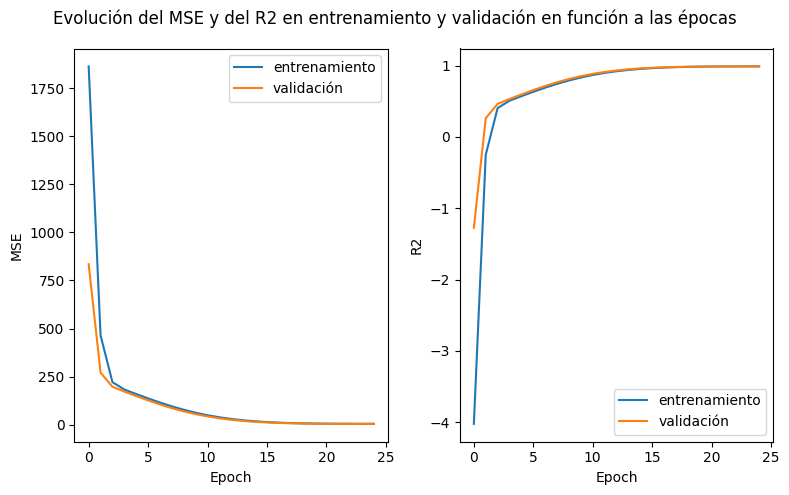

In [248]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
#plt.title('Evolución del MSE en entrenamiento y validación en función a las épocas')
plt.plot(history.history['loss'], label='entrenamiento')
plt.plot(history.history['val_loss'], label = 'validación')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1,2,2)
#plt.title('Evolución del coef determinación en entrenamiento y validación en función a las épocas')
plt.plot(history.history['R2Score'], label='entrenamiento')
plt.plot(history.history['val_R2Score'], label = 'validación')
plt.xlabel('Epoch')
plt.ylabel('R2')
plt.legend()
plt.suptitle('Evolución del MSE y del R2 en entrenamiento y validación en función a las épocas')
plt.tight_layout()
plt.show()

In [249]:
y_pred = model.predict(X_test_esc)
mse_test = mean_squared_error(y_true=y_test,y_pred=y_pred)
r2_test = r2_score(y_true=y_test,y_pred=y_pred)
print('El error cuadrático medio para el conjunto de test es de ',round(mse_test,4))
print('El coeficiente de determinación para el conjunto de test es de ',round(r2_test,4))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step
El error cuadrático medio para el conjunto de test es de  4.5083
El coeficiente de determinación para el conjunto de test es de  0.9876
